<a href="https://colab.research.google.com/github/evoAB/Fake-News-Classifier/blob/main/FakeNewsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# **Dataset imported from Google drive**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':#id is the part of ip address under "",https://drive.google.com/drive/folders/"1FrrP5Iek0BEqsxo1jQAzX88hCEwnn"-ha?usp=sharing}) # replace the id with id of file you want to access(())
downloaded.GetContentFile('True.csv')

In [ ]:
downloaded = drive.CreateFile({'id':#id is the part of ip address under "",https://drive.google.com/drive/folders/"1FrrP5Iek0BEqsxo1jQAzX88hCEwnn"-ha?usp=sharing}) # replace the id with id of file you want to access
downloaded.GetContentFile('Fake.csv')

In [ ]:
import nltk as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading of Dataset**

In [ ]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [ ]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# **Data Pre-Processing**

In [ ]:
true["isfake"] = 0
fake["isfake"] = 1

In [ ]:
true

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
fake

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [ ]:
news = pd.concat([true,fake]).reset_index(drop = True)

In [ ]:
news

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [ ]:
import sklearn
news = sklearn.utils.shuffle(news)
news = news.reset_index(drop = True)
news

,title,text,subject,date,isfake
0,FACTORY WORKER RIPS INTO Speaker Paul Ryan on ...,We love this guy! Factory worker Keith Ketzler...,Government News,"Aug 7, 2017",1
1,"Fed chair choice down to Powell, Taylor, one s...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"October 26, 2017",0
2,Alec Baldwin Returns To SNL To Shower Trump W...,Admit it: Ever since news broke that Donald Tr...,News,"January 15, 2017",1
3,ACTOR JAMES WOODS SHARES Hair-Raising Video Th...,#MerkelLegacy pic.twitter.com/wBh5Cjj2IW Jame...,politics,"Feb 26, 2017",1
4,Kellyanne Lied When She Said She Said She ‘Mi...,Among the never ending stream of Trump adminis...,News,"February 6, 2017",1
...,...,...,...,...,...
44893,Erdogan says Turkey will destroy those in Syri...,ANKARA (Reuters) - President Tayyip Erdogan sa...,worldnews,"December 5, 2017",0
44894,Suspected U.S. drone kills militants on Pakist...,"PARACHINAR, Pakistan (Reuters) - A suspected U...",worldnews,"December 26, 2017",0
44895,Investigation into voter fraud right thing to ...,(Reuters) - U.S. House Speaker Paul Ryan said ...,politicsNews,"January 25, 2017",0
44896,Ex-White House aide and ex-IBM CEO to head cyb...,WASHINGTON (Reuters) - Former White House nati...,politicsNews,"February 17, 2016",0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


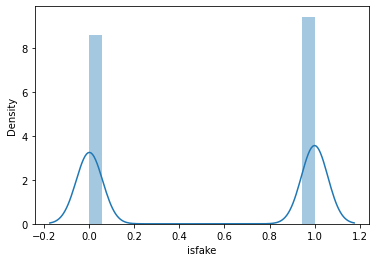

In [ ]:
sns.distplot(news["isfake"])

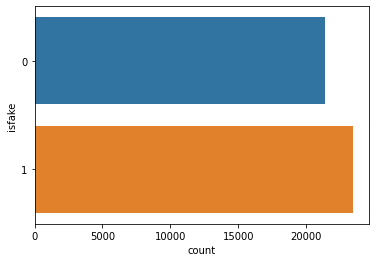

In [ ]:
sns.countplot(y=news["isfake"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


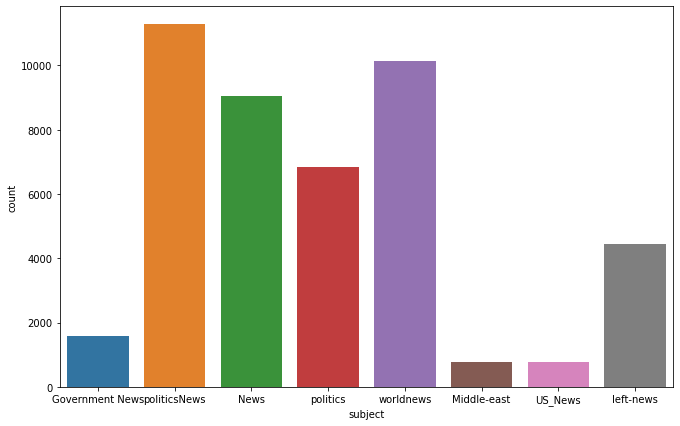

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(news["subject"])

# **Stopwords Elimination Using NLP**

In [ ]:
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words(["english","spanish"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
def preprocessor(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
    return result

In [ ]:
news["original"] = news["title"] + " " + news["text"]

In [ ]:
news["clean"] = news["original"].apply(preprocessor)

In [ ]:
news

,title,text,subject,date,isfake,original,clean
0,FACTORY WORKER RIPS INTO Speaker Paul Ryan on ...,We love this guy! Factory worker Keith Ketzler...,Government News,"Aug 7, 2017",1,FACTORY WORKER RIPS INTO Speaker Paul Ryan on ...,"[factory, worker, rips, speaker, paul, ryan, c..."
1,"Fed chair choice down to Powell, Taylor, one s...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"October 26, 2017",0,"Fed chair choice down to Powell, Taylor, one s...","[chair, choice, powell, taylor, source, tells,..."
2,Alec Baldwin Returns To SNL To Shower Trump W...,Admit it: Ever since news broke that Donald Tr...,News,"January 15, 2017",1,Alec Baldwin Returns To SNL To Shower Trump W...,"[alec, baldwin, returns, shower, trump, jokes,..."
3,ACTOR JAMES WOODS SHARES Hair-Raising Video Th...,#MerkelLegacy pic.twitter.com/wBh5Cjj2IW Jame...,politics,"Feb 26, 2017",1,ACTOR JAMES WOODS SHARES Hair-Raising Video Th...,"[actor, james, woods, shares, hair, raising, v..."
4,Kellyanne Lied When She Said She Said She ‘Mi...,Among the never ending stream of Trump adminis...,News,"February 6, 2017",1,Kellyanne Lied When She Said She Said She ‘Mi...,"[kellyanne, lied, said, said, misspoke, bowlin..."
...,...,...,...,...,...,...,...
44893,Erdogan says Turkey will destroy those in Syri...,ANKARA (Reuters) - President Tayyip Erdogan sa...,worldnews,"December 5, 2017",0,Erdogan says Turkey will destroy those in Syri...,"[erdogan, says, turkey, destroy, syria, linked..."
44894,Suspected U.S. drone kills militants on Pakist...,"PARACHINAR, Pakistan (Reuters) - A suspected U...",worldnews,"December 26, 2017",0,Suspected U.S. drone kills militants on Pakist...,"[suspected, drone, kills, militants, pakistan,..."
44895,Investigation into voter fraud right thing to ...,(Reuters) - U.S. House Speaker Paul Ryan said ...,politicsNews,"January 25, 2017",0,Investigation into voter fraud right thing to ...,"[investigation, voter, fraud, right, thing, ho..."
44896,Ex-White House aide and ex-IBM CEO to head cyb...,WASHINGTON (Reuters) - Former White House nati...,politicsNews,"February 17, 2016",0,Ex-White House aide and ex-IBM CEO to head cyb...,"[white, house, aide, head, cyber, security, pa..."


In [ ]:
news["cleaned_joined"] = news["clean"].apply(lambda x:" ".join(x))

In [ ]:
news

,title,text,subject,date,isfake,original,clean,cleaned_joined
0,FACTORY WORKER RIPS INTO Speaker Paul Ryan on ...,We love this guy! Factory worker Keith Ketzler...,Government News,"Aug 7, 2017",1,FACTORY WORKER RIPS INTO Speaker Paul Ryan on ...,"[factory, worker, rips, speaker, paul, ryan, c...",factory worker rips speaker paul ryan congress...
1,"Fed chair choice down to Powell, Taylor, one s...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"October 26, 2017",0,"Fed chair choice down to Powell, Taylor, one s...","[chair, choice, powell, taylor, source, tells,...",chair choice powell taylor source tells politi...
2,Alec Baldwin Returns To SNL To Shower Trump W...,Admit it: Ever since news broke that Donald Tr...,News,"January 15, 2017",1,Alec Baldwin Returns To SNL To Shower Trump W...,"[alec, baldwin, returns, shower, trump, jokes,...",alec baldwin returns shower trump jokes russia...
3,ACTOR JAMES WOODS SHARES Hair-Raising Video Th...,#MerkelLegacy pic.twitter.com/wBh5Cjj2IW Jame...,politics,"Feb 26, 2017",1,ACTOR JAMES WOODS SHARES Hair-Raising Video Th...,"[actor, james, woods, shares, hair, raising, v...",actor james woods shares hair raising video sh...
4,Kellyanne Lied When She Said She Said She ‘Mi...,Among the never ending stream of Trump adminis...,News,"February 6, 2017",1,Kellyanne Lied When She Said She Said She ‘Mi...,"[kellyanne, lied, said, said, misspoke, bowlin...",kellyanne lied said said misspoke bowling gree...
...,...,...,...,...,...,...,...,...
44893,Erdogan says Turkey will destroy those in Syri...,ANKARA (Reuters) - President Tayyip Erdogan sa...,worldnews,"December 5, 2017",0,Erdogan says Turkey will destroy those in Syri...,"[erdogan, says, turkey, destroy, syria, linked...",erdogan says turkey destroy syria linked kurdi...
44894,Suspected U.S. drone kills militants on Pakist...,"PARACHINAR, Pakistan (Reuters) - A suspected U...",worldnews,"December 26, 2017",0,Suspected U.S. drone kills militants on Pakist...,"[suspected, drone, kills, militants, pakistan,...",suspected drone kills militants pakistan afgha...
44895,Investigation into voter fraud right thing to ...,(Reuters) - U.S. House Speaker Paul Ryan said ...,politicsNews,"January 25, 2017",0,Investigation into voter fraud right thing to ...,"[investigation, voter, fraud, right, thing, ho...",investigation voter fraud right thing house sp...
44896,Ex-White House aide and ex-IBM CEO to head cyb...,WASHINGTON (Reuters) - Former White House nati...,politicsNews,"February 17, 2016",0,Ex-White House aide and ex-IBM CEO to head cyb...,"[white, house, aide, head, cyber, security, pa...",white house aide head cyber security panel was...


In [ ]:
from wordcloud import WordCloud

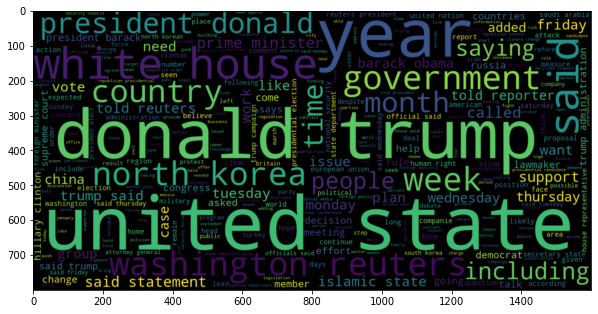

In [ ]:
plt.figure(figsize = (10,10))
wc = WordCloud(width = 1600, height = 800, 
                stopwords = stop_words,max_words = 2000, 
                min_font_size = 10).generate(" ".join(news[news.isfake == 0].cleaned_joined))
plt.imshow(wc,interpolation="bilinear")

In [ ]:
from nltk.tokenize import LineTokenizer
import nltk

In [ ]:
max_len = -1
for doc in news.cleaned_joined:
    token = nltk.word_tokenize(doc)
    if max_len < len(token):
        max_len = len(token)
        print(max_len)

296
370
547
962
1345
1346
1580
1953
4185
4335
4404


In [ ]:
x = news.iloc[:,-1]
y = news.iloc[:,-4]

In [ ]:
list_of_words = []
for i in news.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

108670

# **Test-Train Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
len(x_train)

35918

In [ ]:
len(x_test)

8980

In [ ]:
len(x_test)/len(x)

0.20000890908280994

# **Text Tokenization and Padding**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
len(train_sequences)

35918

In [ ]:
len(test_sequences)

8980

In [ ]:
print("the encoding for the document\n",news.cleaned_joined[0],"\nis ",train_sequences[0])

the encoding for the document
 factory worker rips speaker paul ryan congress video love factory worker keith ketzler horrible years heard control house control senate presidency plan going change stuff tell infighting dysfunctional said american like paul ryan notice answer rhetoric blah blah blah talk action paul ryan pocket chamber commerce special groups talking sides mouth needs paul ryan audio gives insight feels trump audio released paul ryan caught tape going defend donald trump future know paul ryan president donald trump running office sadly unlike democrats held noses went hillary republican speaker house went support trump highly contentious campaign audio tape emerged proving ryan went sure colleagues house understood support trump leaves ryan looking pretty foolish considering public support trump offered ryan increasingly unpopular obamacare lite proposal released private october conference house republican members house speaker paul ryan told members house representativ

In [ ]:
len(news.cleaned_joined[56])

953

In [ ]:
len(train_sequences[0])

169

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
padded_train = pad_sequences(train_sequences,maxlen=max_len,padding="post",truncating="post")
padded_test = pad_sequences(test_sequences,maxlen=max_len,padding="post",truncating="post")

In [ ]:
padded_train

array([[ 1370, 23339,   180, ...,     0,     0,     0],
       [  957,  4939, 15255, ...,     0,     0,     0],
       [  847,  1091,   314, ...,     0,     0,     0],
       ...,
       [   89,  1111,   849, ...,     0,     0,     0],
       [ 2299,   697,   533, ...,     0,     0,     0],
       [   98,   452,  5438, ...,     0,     0,     0]], dtype=int32)

In [ ]:
for i,doc in enumerate(padded_train):
    print(i,len(doc))

Streaming output truncated to the last 5000 lines.
30918 4404
30919 4404
30920 4404
30921 4404
30922 4404
30923 4404
30924 4404
30925 4404
30926 4404
30927 4404
30928 4404
30929 4404
30930 4404
30931 4404
30932 4404
30933 4404
30934 4404
30935 4404
30936 4404
30937 4404
30938 4404
30939 4404
30940 4404
30941 4404
30942 4404
30943 4404
30944 4404
30945 4404
30946 4404
30947 4404
30948 4404
30949 4404
30950 4404
30951 4404
30952 4404
30953 4404
30954 4404
30955 4404
30956 4404
30957 4404
30958 4404
30959 4404
30960 4404
30961 4404
30962 4404
30963 4404
30964 4404
30965 4404
30966 4404
30967 4404
30968 4404
30969 4404
30970 4404
30971 4404
30972 4404
30973 4404
30974 4404
30975 4404
30976 4404
30977 4404
30978 4404
30979 4404
30980 4404
30981 4404
30982 4404
30983 4404
30984 4404
30985 4404
30986 4404
30987 4404
30988 4404
30989 4404
30990 4404
30991 4404
30992 4404
30993 4404
30994 4404
30995 4404
30996 4404
30997 4404
30998 4404
30999 4404
31000 4404
31001 4404
31002 4404
31003 4404
310

In [ ]:
for i,doc in enumerate(padded_test):
    print(i,len(doc))

Streaming output truncated to the last 5000 lines.
3980 4404
3981 4404
3982 4404
3983 4404
3984 4404
3985 4404
3986 4404
3987 4404
3988 4404
3989 4404
3990 4404
3991 4404
3992 4404
3993 4404
3994 4404
3995 4404
3996 4404
3997 4404
3998 4404
3999 4404
4000 4404
4001 4404
4002 4404
4003 4404
4004 4404
4005 4404
4006 4404
4007 4404
4008 4404
4009 4404
4010 4404
4011 4404
4012 4404
4013 4404
4014 4404
4015 4404
4016 4404
4017 4404
4018 4404
4019 4404
4020 4404
4021 4404
4022 4404
4023 4404
4024 4404
4025 4404
4026 4404
4027 4404
4028 4404
4029 4404
4030 4404
4031 4404
4032 4404
4033 4404
4034 4404
4035 4404
4036 4404
4037 4404
4038 4404
4039 4404
4040 4404
4041 4404
4042 4404
4043 4404
4044 4404
4045 4404
4046 4404
4047 4404
4048 4404
4049 4404
4050 4404
4051 4404
4052 4404
4053 4404
4054 4404
4055 4404
4056 4404
4057 4404
4058 4404
4059 4404
4060 4404
4061 4404
4062 4404
4063 4404
4064 4404
4065 4404
4066 4404
4067 4404
4068 4404
4069 4404
4070 4404
4071 4404
4072 4404
4073 4404
4074 4404

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Bidirectional,LSTM
model = Sequential()
model.add(Embedding(total_words, output_dim = 128))
model.add(Bidirectional(LSTM(128)))


model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
total_words

108670

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
y_train

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
model.fit(padded_train,y_train,batch_size=64, validation_split=0.1, epochs = 2)

Epoch 1/2
506/506 [==============================] - 354s 632ms/step - loss: 0.1613 - acc: 0.9204 - val_loss: 0.0036 - val_acc: 0.9992
Epoch 2/2
506/506 [==============================] - 317s 627ms/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0081 - val_acc: 0.9981


In [ ]:
pred = model.predict(padded_test)
prediction = []
for i in range(len(pred)):
    if pred[i].item()>0.5:
        prediction.append(1)
    else:
        prediction.append(0)
        
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(y_test), prediction)

In [ ]:
accuracy

0.9983296213808464

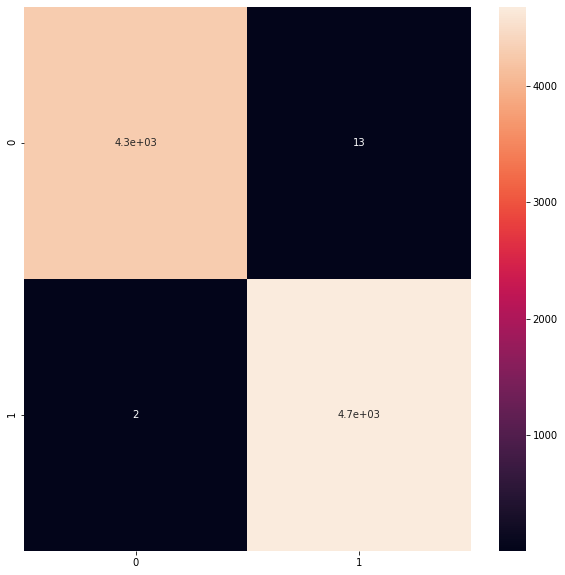

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)